# Credit Card Lead Prediction

importing Libraries

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score
import sklearn.metrics as m

Loading train and test data

In [60]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [61]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [201]:
train.shape

(245725, 10)

The train dataset consists of 245725 data points and 11 variables

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


Checking missing values

In [63]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

The data set consists of 29325 missing values in Credit_Product

In [64]:
train["Credit_Product"].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

 Filling the missing values with "Unknown"

In [65]:
train = train.fillna("Unknown")

In [66]:
train["Is_Lead"]=train["Is_Lead"].astype("object")

### Descriptive Statistics

In [68]:
train.describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


In [69]:
train.describe(include="object")

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Is_Lead
count,245725,245725,245725,245725,245725,245725,245725,245725
unique,245725,2,35,4,4,3,2,2
top,CGJLGMV2,Male,RG268,Self_Employed,X1,No,No,0
freq,1,134197,35934,100886,103718,144357,150290,187437


Removing "ID" column from train data

In [70]:
train.drop(labels=["ID"],axis=1,inplace=True)

Separating categorical and continuous column names to separate lists

In [71]:
def catcon(df):
    cat=[]
    con=[]
    for i in df.columns:
        if df[i].dtypes == "object":
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [72]:
train_cat, train_con=catcon(train)

In [73]:
train_cat

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active',
 'Is_Lead']

In [74]:
train_con

['Age', 'Vintage', 'Avg_Account_Balance']

### Univariate Analysis

In [75]:
def univ(df):
    cat,con=catcon(df)
    for i in cat:
        sns.countplot(df[i])
        plt.show()

    for i in con:
        sns.distplot(df[i])
        plt.show()


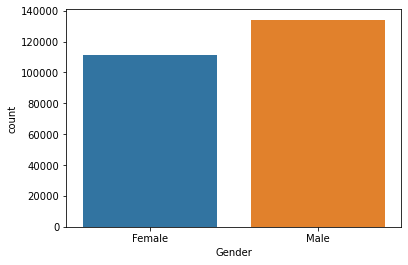

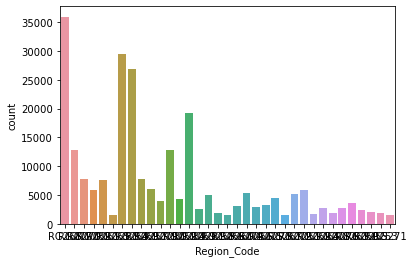

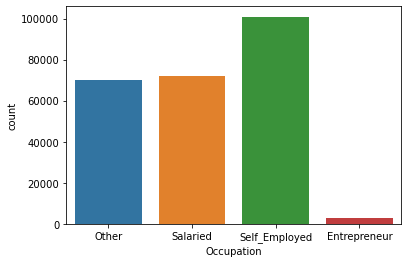

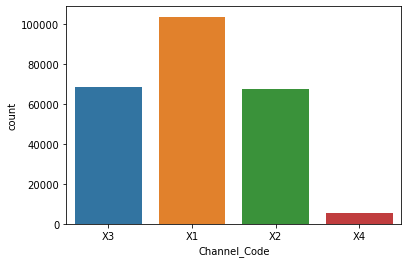

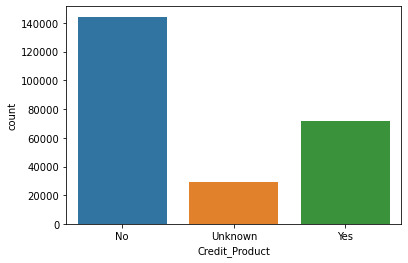

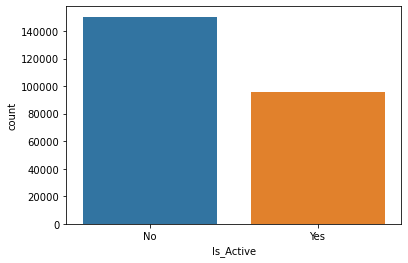

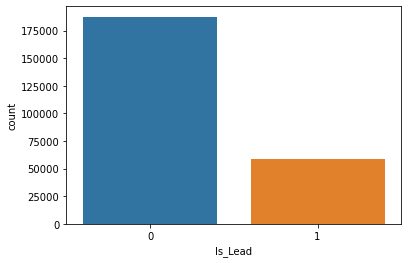

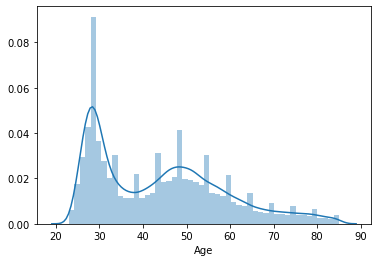

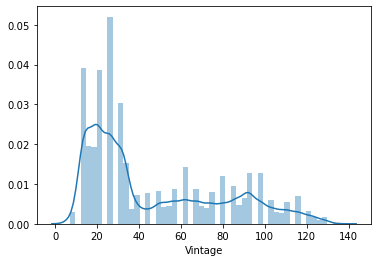

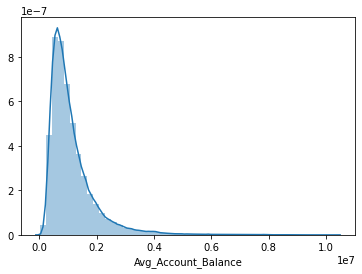

In [76]:
univ(train)

#### Description of Univariate Analysis

Gender: There are more male customers than female customers

Occupation: Maximum number of customers are self employed, the least are entrepreneurs.

Channel_Code: Customer with channel code "X1" are maximum and customer with channel code "X4" are minimum.

Credit_Product: Most of the customers does not have active credit products.

Is_Active: Customers who are not active from last three months are more than customers who are active

Is_Lead: There are more number of cutomers who are not interested for credit card

Age: Customers' age varies from 25 to 80. Maximum number of employees are between 25 to 35.

Avg_Account_Balance: Customers account balance range between 20790 and 10352009. Also it is rightly skewed.

### Bivariate Analysis

In [77]:
def bivar(df):
    cat,con=catcon(df)
    for i in cat:
        for j in con:
            sns.boxplot(df[i],df[j])
            plt.show()
    for i in con:
        for j in con:
            sns.scatterplot(df[i],df[j])
            plt.show()
    for i in cat:
        for j in cat:
            sns.countplot(df[i],hue=df[j])
            plt.show()

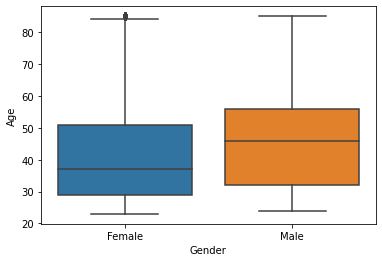

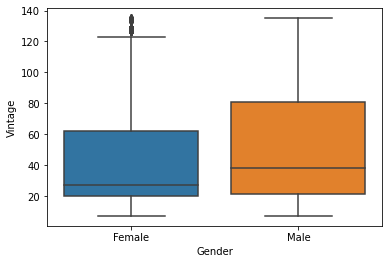

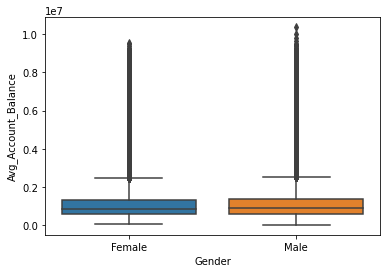

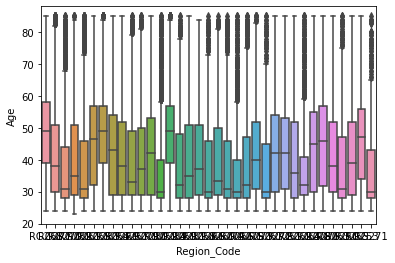

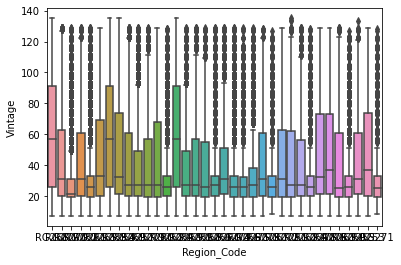

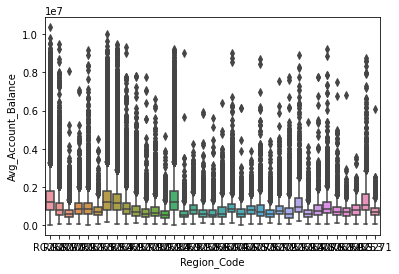

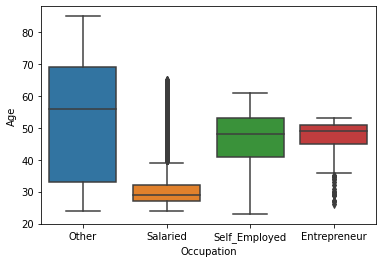

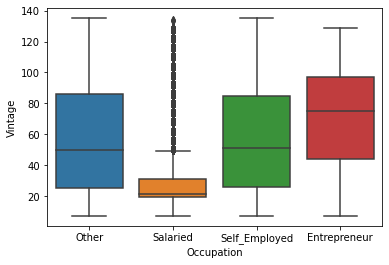

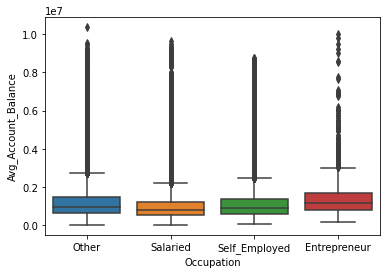

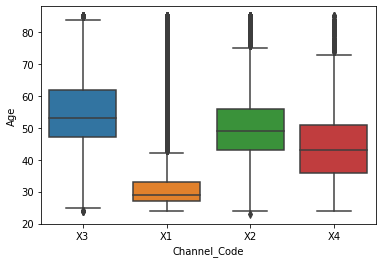

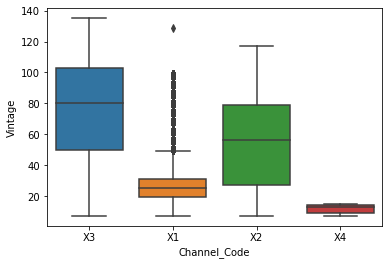

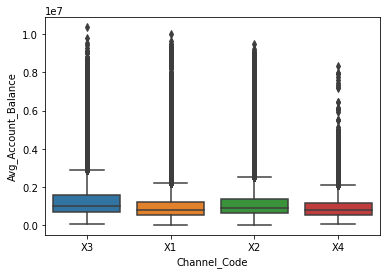

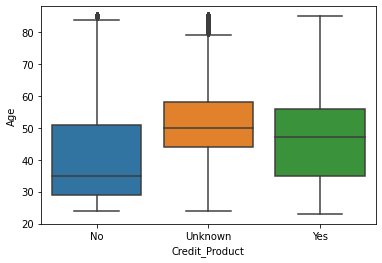

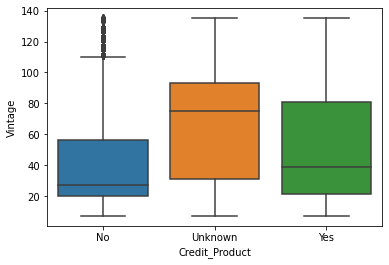

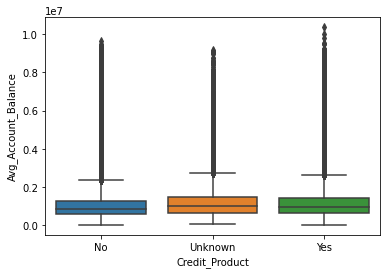

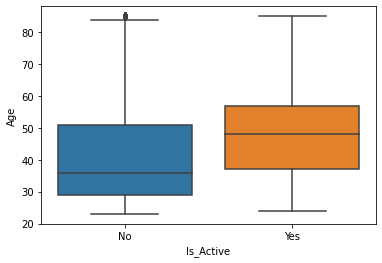

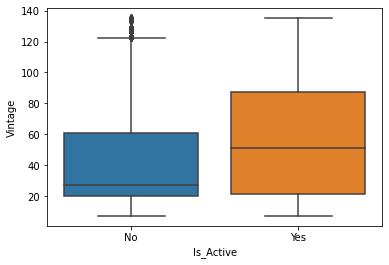

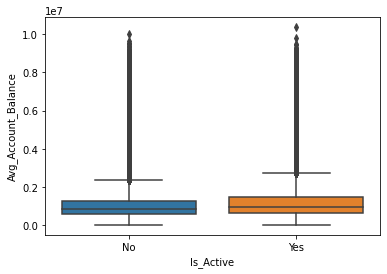

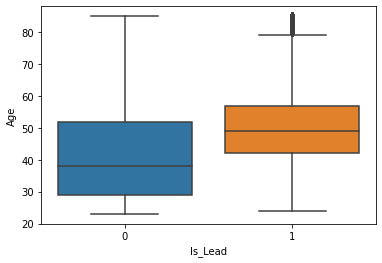

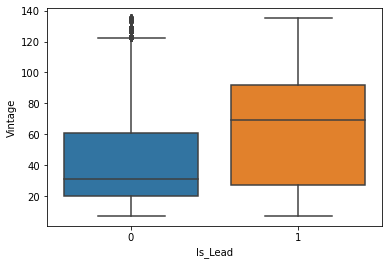

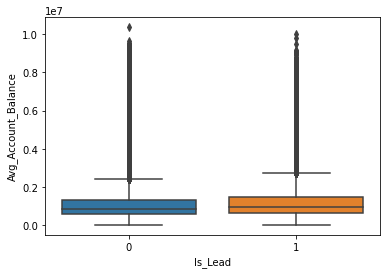

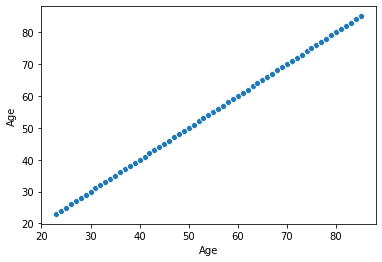

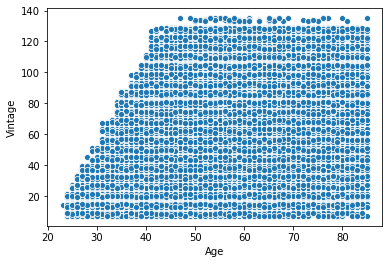

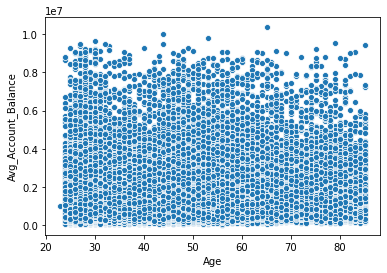

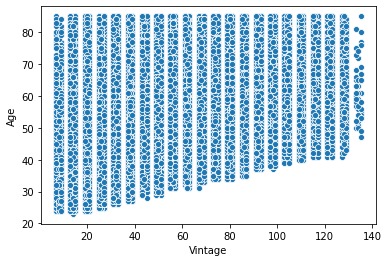

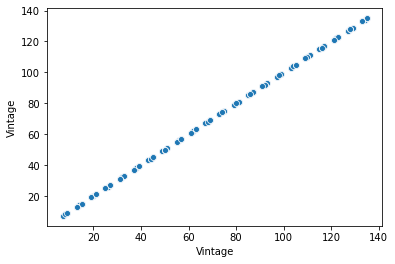

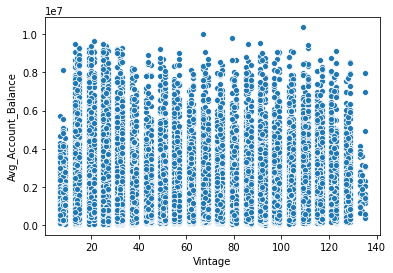

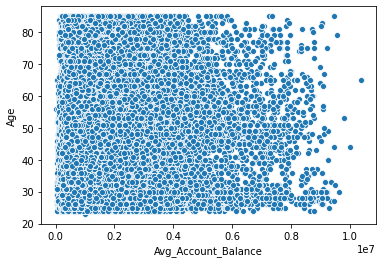

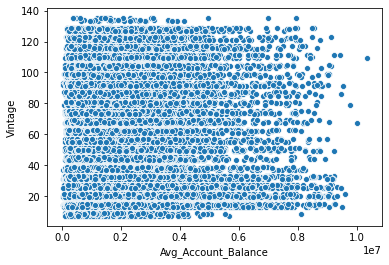

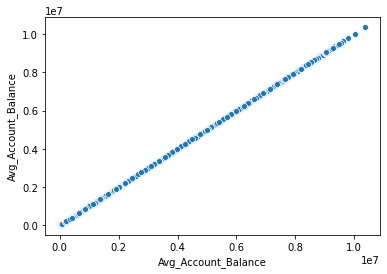

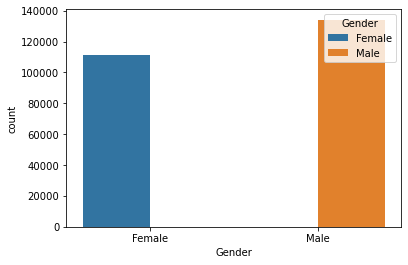

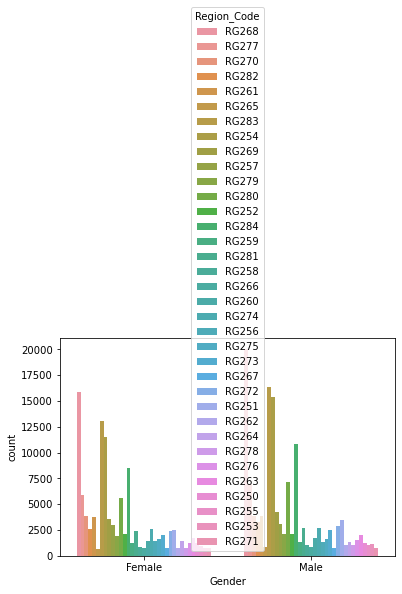

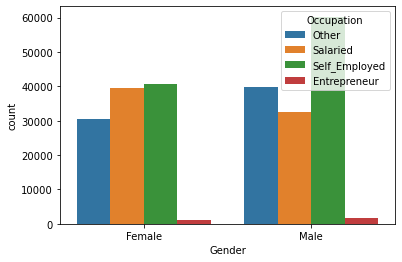

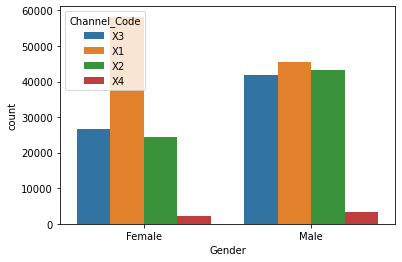

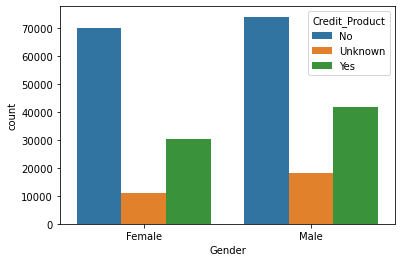

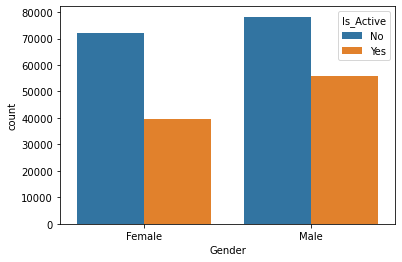

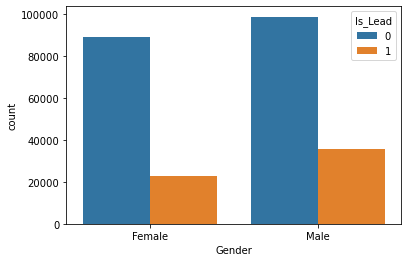

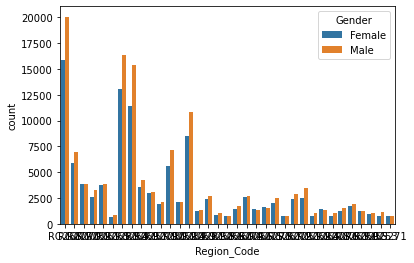

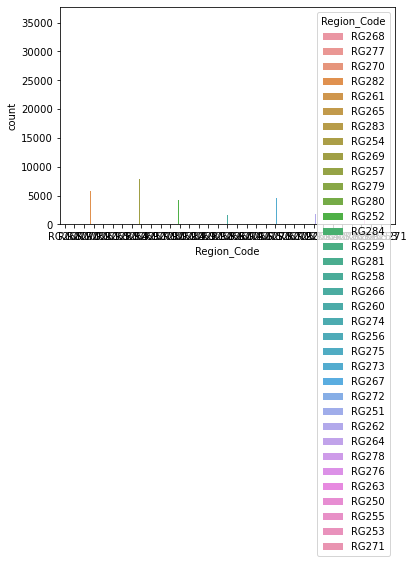

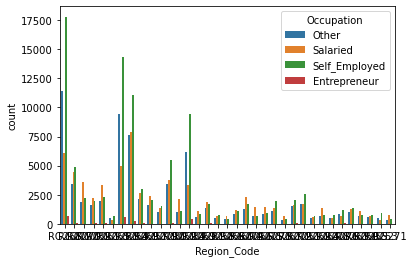

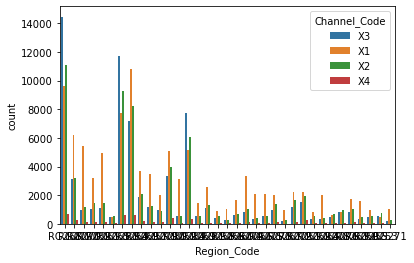

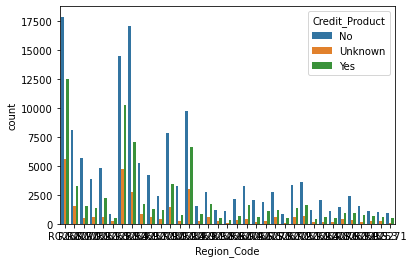

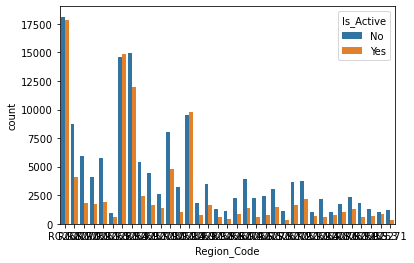

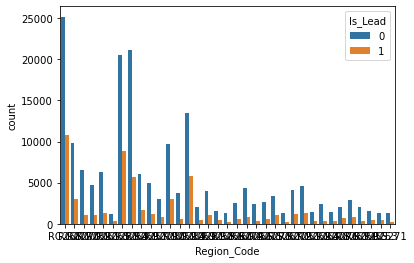

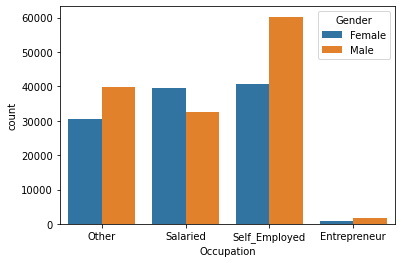

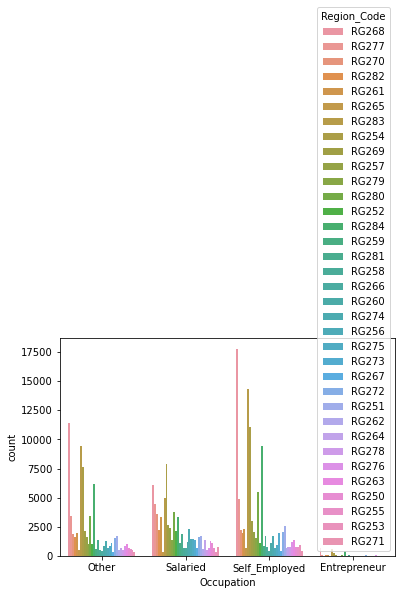

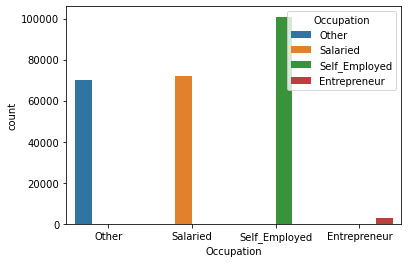

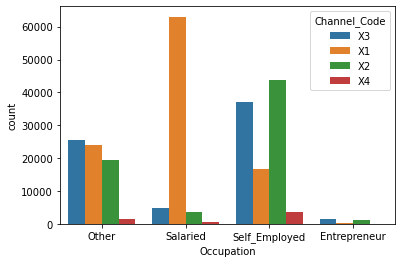

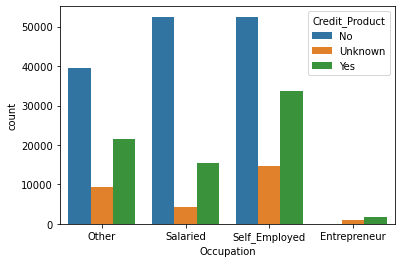

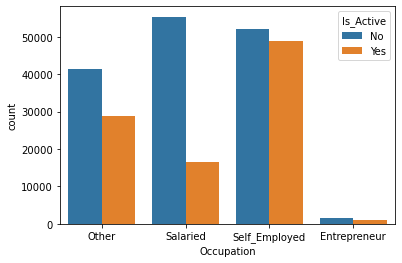

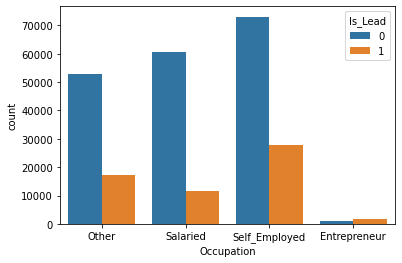

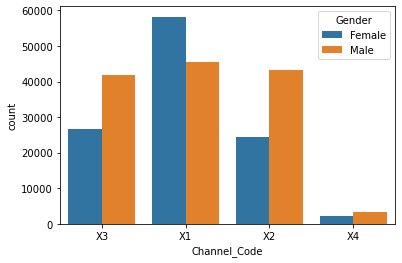

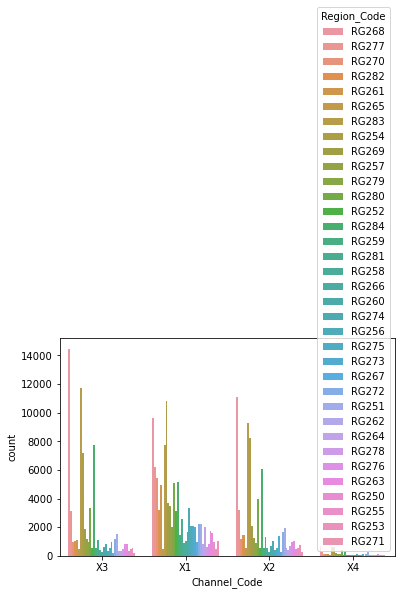

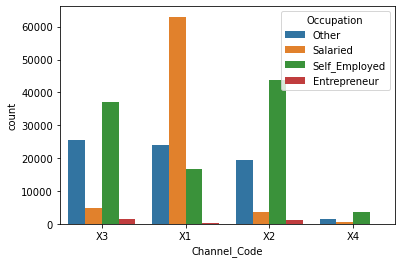

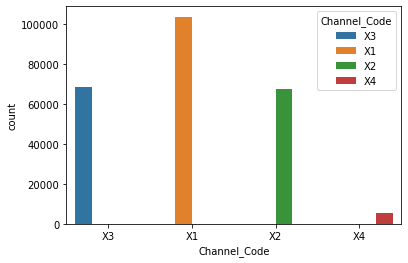

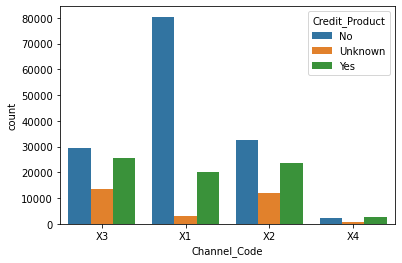

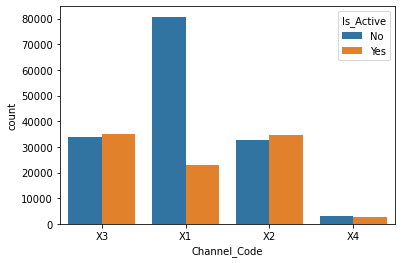

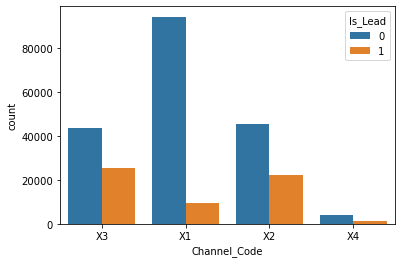

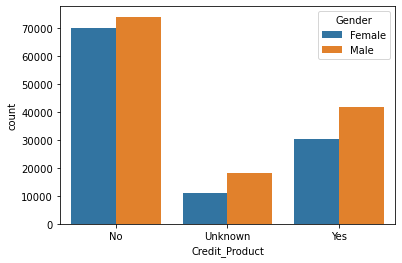

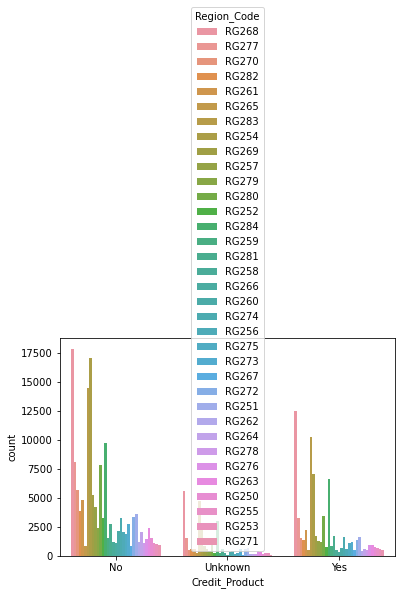

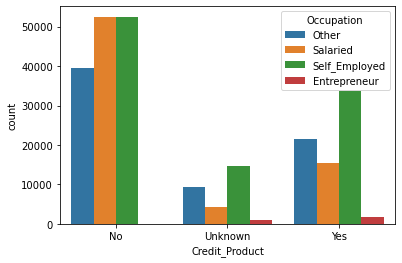

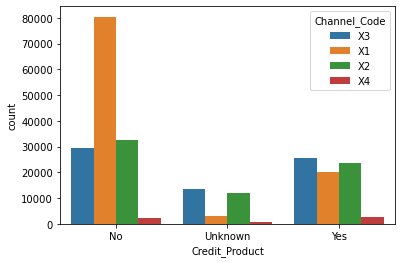

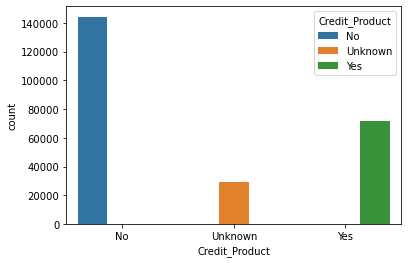

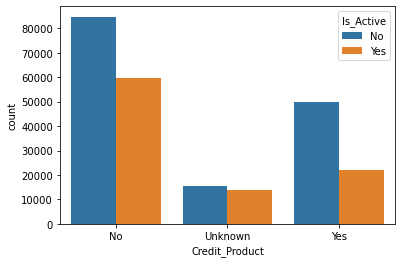

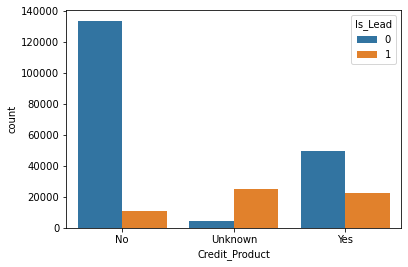

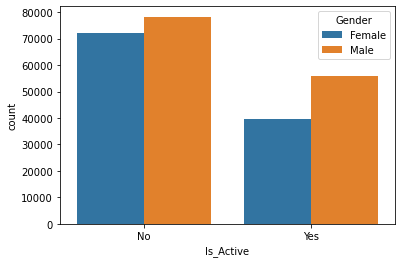

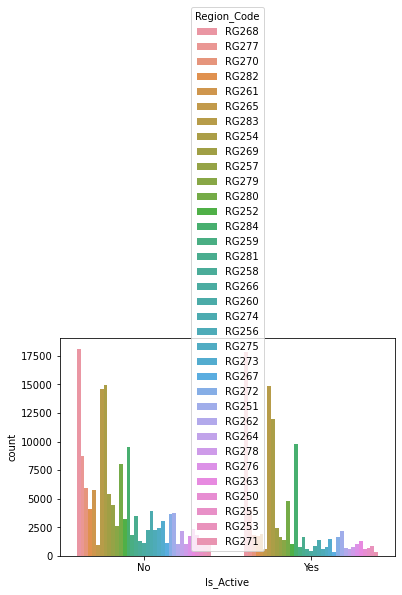

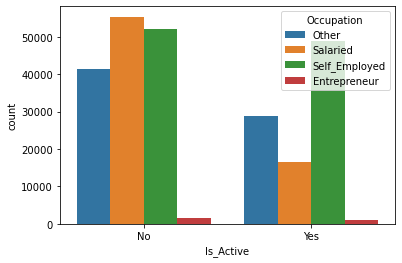

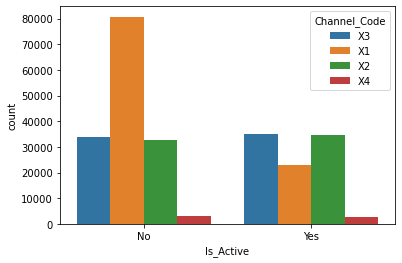

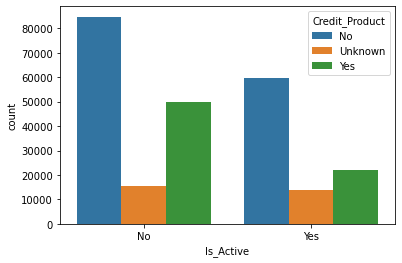

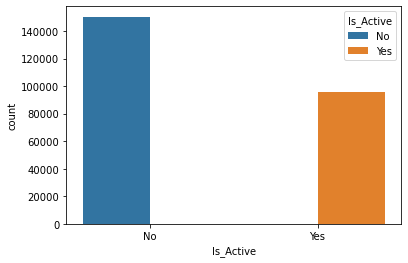

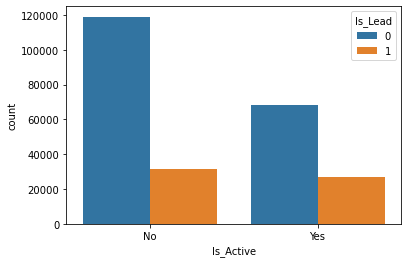

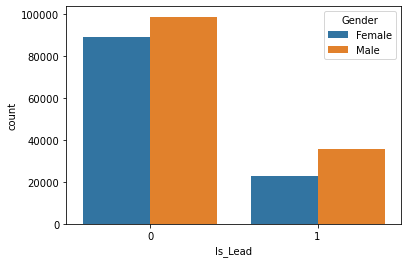

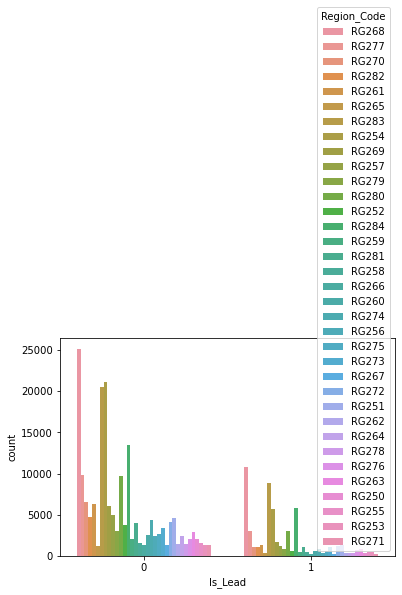

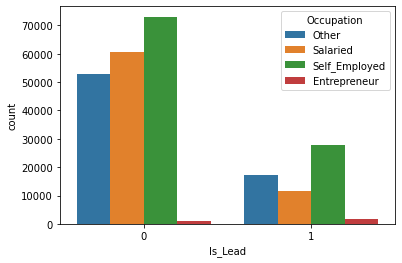

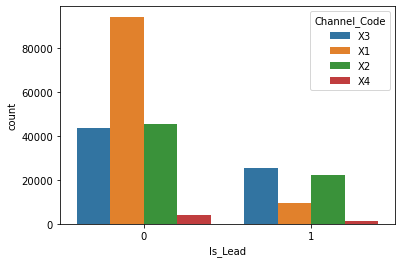

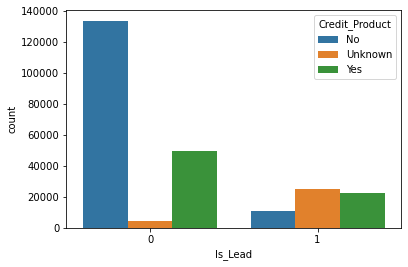

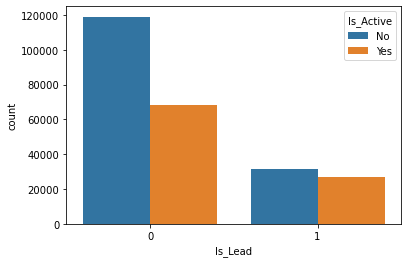

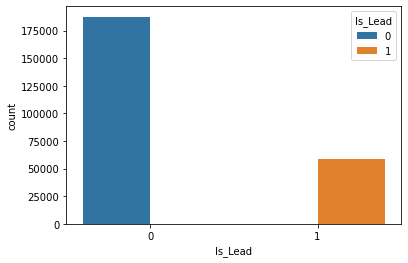

In [78]:
bivar(train)

#### Description of Bivariate analysis

Female customers are younger than male customers

Vintage for female customers are less than male cutomers

The customers who does not have any active product are younger than those who have active product.

Customers for which we dont know whether they have active credit product or does not have active product have mode vintage

The customers who does not have active product are younger.

The customers who does not have active product have less vintage.

Customers who are interested in credit card are older than customers who are not interested.

Customers who are interested in credit card have more vintage.

Customers who dont have active credit products are less interested in credit cards.

Customers with channel code X1 are not interested in credit card.

Salaried customers are more active.

All Entrepreneurs have an active credit product








## Hypothesis Testing

### Statistical evidences which factors influence target (Is_Lead)

### Comparing age and Is_Lead

In [79]:
train.groupby("Is_Lead")["Age"].mean()

Is_Lead
0    41.947662
1    49.993944
Name: Age, dtype: float64

In [80]:
print('Mean and standard deviation of Age of customers who are not interested in credit card : %3.2f, %3.2f' % ( train.groupby("Is_Lead")["Age"].mean()[0],train.groupby("Is_Lead")["Age"].std()[0]))
print('Mean and standard deviation of Age of customers who are interested in credit card :  %3.2f, %3.2f' % ( train.groupby("Is_Lead")["Age"].mean()[1],train.groupby("Is_Lead")["Age"].std()[1]))


Mean and standard deviation of Age of customers who are not interested in credit card : 41.95, 14.88
Mean and standard deviation of Age of customers who are interested in credit card :  49.99, 12.88


the above values indicates that there is difference between the average age of customers who are interested and not interested in credit cards

Collecting the statistical evidence using ttest

Setting null and alternate hypothesis
* $H_0$: the two groups have same age average
* $H_A$: there is differnce between average age 

Selecting significance level α=0.05

In [81]:
age_no=train[train.Is_Lead==0]['Age']
age_yes=train[train.Is_Lead==1]['Age']

In [82]:
from scipy.stats import ttest_1samp, ttest_ind
t_statistic, p_value = ttest_ind(age_no, age_yes)
print(t_statistic, p_value)

-117.59063299067188 0.0


The p value comes out to be 0.0 which is less than 5% level of significance. Thus we can reject the null hypothesis

Thus it is statistically evident that the average age of customers who are interested in credit cards have average age more than those who are not interested

### Comparing Vintage and Is_Lead

In [84]:
print('Mean and standard deviation of vintage of customers who are not interested in credit cards  : %3.2f, %3.2f' % ( train.groupby("Is_Lead")["Vintage"].mean()[0],train.groupby("Is_Lead")["Vintage"].std()[0]))
print('Mean and standard deviation of vintage of customers who are interested in credit cards :  %3.2f, %3.2f' % ( train.groupby("Is_Lead")["Vintage"].mean()[1],train.groupby("Is_Lead")["Vintage"].std()[1]))


Mean and standard deviation of vintage of customers who are not interested in credit cards  : 41.91, 29.99
Mean and standard deviation of vintage of customers who are interested in credit cards :  63.18, 34.28


the above values indicates that there is difference between the average vintage for customers who are interested and not interested in credit cards

Collecting the statistical evidence using ttest

Setting null and alternate hypothesis
* $H_0$: the two groups have same vintage average
* $H_A$: there is differnce between average vintage 

Selecting significance level α=0.05

In [85]:
vintage_no=train[train.Is_Lead==0]['Vintage']
vintage_yes=train[train.Is_Lead==1]['Vintage']

In [86]:
from scipy.stats import ttest_1samp, ttest_ind
t_statistic, p_value = ttest_ind(vintage_no,vintage_yes)
print(t_statistic, p_value)

-144.37999711647805 0.0


 The p-value comes out to be 0.0 which is less than 5% significance level. We can reject null hypothesis

So it is statistically evident that the customers who are not interested in credit cards have less vintage than those who are interested.


### Channel_Code and Is_Lead

In [90]:
pd.crosstab(train.Channel_Code,train.Is_Lead)

Is_Lead,0,1
Channel_Code,,
X1,94236,9482
X2,45519,22207
X3,43493,25219
X4,4189,1380


 The above values indicate that the most of customers who are interested in Credit Card are from channel code X3.
 
 Lets see statistically
 
 Setting null and alternate hypothesis
* $H_0$: there is no association between Channel code and Is_Lead
* $H_A$: there is association between Channel code and Is_Lead


Selecting significance level α=0.05

Using chi square test of independence

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train.Channel_Code,train.Is_Lead))

the p value comes out to be less than 5% level of significance. We can reject the null hypothesis.

Thus it is statistically evident that channel code and is lead are associated

### Credit_Product and Is_Lead

In [92]:
pd.crosstab(train.Credit_Product,train.Is_Lead)

Is_Lead,0,1
Credit_Product,,
No,133734,10623
Unknown,4350,24975
Yes,49353,22690


 The above values indicate that most of the customers for which we dont know about their credit Product are interested in Credit Cards
 
 Lets see statistically
 
 Setting null and alternate hypothesis
* $H_0$: there is no association between Credit Product and Is_Lead
* $H_A$: there is association between Credit Product and Is_Lead


Selecting significance level α=0.05

Using chi square test of independence

In [93]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train.Credit_Product,train.Is_Lead))

(84955.19941132756, 0.0, 2, array([[110114.32702818,  34242.67297182],
        [ 22368.86773833,   6956.13226167],
        [ 54953.80523349,  17089.19476651]]))

the p value comes out to be less than 5% level of significance. We can reject the null hypothesis.

Thus it is statistically evident that credit product and is lead are associated

### Is_Active and Is_Lead

In [94]:
pd.crosstab(train.Is_Active,train.Is_Lead)

Is_Lead,0,1
Is_Active,,
No,119007,31283
Yes,68430,27005


 The above values indicate that most of the customers which are not active are not interested in credit cards
 Lets see statistically
 
 Setting null and alternate hypothesis
* $H_0$: there is no association between  Is_Active and Is_Lead
* $H_A$: there is association between Is_Active and Is_Lead


Selecting significance level α=0.05

Using chi square test of independence

In [95]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train.Is_Active,train.Is_Lead))

(1805.2967681025368, 0.0, 1, array([[114639.97041408,  35650.02958592],
        [ 72797.02958592,  22637.97041408]]))

the p value comes out to be less than 5% level of significance. We can reject the null hypothesis.

Thus it is statistically evident that Is_Active and Is_Lead are associated

### Occupation and Vintage

In [122]:
print('Count, Mean and standard deviation of vintage of Entrepreneurs customers : %3d, %3.2f, %3.2f' % ((train["Occupation"].value_counts()[3]), train.groupby("Occupation")["Vintage"].mean()[1],train.groupby("Occupation")["Vintage"].std()[1]))
print('Count, Mean and standard deviation of vintage of customers who have others as occupation : %3d, %3.2f, %3.2f' % ((train["Occupation"].value_counts()[2]),train.groupby("Occupation")["Vintage"].mean()[2],train.groupby("Occupation")["Vintage"].std()[2]))
print('Count, Mean and standard deviation of vintage of salaried customers  : %3d, %3.2f, %3.2f' % ((train["Occupation"].value_counts()[1]), train.groupby("Occupation")["Vintage"].mean()[0],train.groupby("Occupation")["Vintage"].std()[0]))
print('Count, Mean and standard deviation of vintage of self employed customers   : %3d, %3.2f, %3.2f' % ((train["Occupation"].value_counts()[0]), train.groupby("Occupation")["Vintage"].mean()[0],train.groupby("Occupation")["Vintage"].std()[0]))

Count, Mean and standard deviation of vintage of Entrepreneurs customers : 100886, 54.92, 34.34
Count, Mean and standard deviation of vintage of customers who have others as occupation : 71999, 26.35, 16.97
Count, Mean and standard deviation of vintage of salaried customers  : 70173, 69.66, 32.31
Count, Mean and standard deviation of vintage of self employed customers   : 2667, 69.66, 32.31


In [173]:
#train["Occupation"].value_counts()

The average Vintage per Occupation gives first insight for which occupation vintage is high - in this case - Entrepreneurs. But averages alone are not good enough descripton of the situation, we need to have statistical evidence. Using 1 way Anova in current case of comparing more than 2 groups means

### Steps

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ = $\mu4$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean vintage of Entrepreneurs, others, salaried and self-employed  customers respectively

Here we select α = 0.05

There are four groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.


In [123]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm=ols('Vintage ~ Occupation', data=train).fit()
table=sm.stats.anova_lm(lm)
print(table)


                  df        sum_sq       mean_sq             F  PR(>F)
Occupation       3.0  4.381773e+07  1.460591e+07  16819.044142     0.0
Residual    245721.0  2.133878e+08  8.684151e+02           NaN     NaN


The p value comes out to be 0.0 and it is less than our chosen level of signifance at 5%

We reject the null hypothesis.

This means that there is  enough evidence to assume a general difference in vintage of customers with different occupation.

# Channel_Code and Age

In [129]:
print('Count, Mean and standard deviation of Age of customers with channel code X1 : %3d, %3.2f, %3.2f' % ((train["Channel_Code"].value_counts()[0]), train.groupby("Channel_Code")["Age"].mean()[0],train.groupby("Channel_Code")["Age"].std()[0]))
print('Count, Mean and standard deviation of Age of customers with channel code X2 : %3d, %3.2f, %3.2f' % ((train["Channel_Code"].value_counts()[2]),train.groupby("Channel_Code")["Age"].mean()[1],train.groupby("Channel_Code")["Age"].std()[1]))
print('Count, Mean and standard deviation of Age of customers with channel code X3 : %3d, %3.2f, %3.2f' % ((train["Channel_Code"].value_counts()[1]), train.groupby("Channel_Code")["Age"].mean()[2],train.groupby("Channel_Code")["Age"].std()[2]))
print('Count, Mean and standard deviation of Age of customers with channel code X4 : %3d, %3.2f, %3.2f' % ((train["Channel_Code"].value_counts()[3]), train.groupby("Channel_Code")["Age"].mean()[3],train.groupby("Channel_Code")["Age"].std()[3]))

Count, Mean and standard deviation of Age of customers with channel code X1 : 103718, 32.32, 9.65
Count, Mean and standard deviation of Age of customers with channel code X2 : 67726, 50.42, 11.33
Count, Mean and standard deviation of Age of customers with channel code X3 : 68712, 54.72, 12.14
Count, Mean and standard deviation of Age of customers with channel code X4 : 5569, 44.76, 11.50


### Steps

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ = $\mu4$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean age of customers with channel coe X1, X2, X3, X4 respectively

Here we select α = 0.05

There are four groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.


In [132]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm=ols('Age ~ Channel_Code', data=train).fit()
table=sm.stats.anova_lm(lm)
print(table)


                    df        sum_sq       mean_sq             F  PR(>F)
Channel_Code       3.0  2.482259e+07  8.274196e+06  69605.469169     0.0
Residual      245721.0  2.920954e+07  1.188728e+02           NaN     NaN


The p value comes out to be 0.0 and it is less than our chosen level of signifance at 5%

We reject the null hypothesis.

This means that there is  enough evidence to assume a general difference in age of customers with different Channel code.

### Credit_Product and Age

In [137]:
print('Count, Mean and standard deviation of Age of customers with no credit product : %3d, %3.2f, %3.2f' % ((train["Credit_Product"].value_counts()[0]), train.groupby("Credit_Product")["Age"].mean()[0],train.groupby("Credit_Product")["Age"].std()[0]))
print('Count, Mean and standard deviation of Age of customers with credit product : %3d, %3.2f, %3.2f' % ((train["Credit_Product"].value_counts()[1]),train.groupby("Credit_Product")["Age"].mean()[2],train.groupby("Credit_Product")["Age"].std()[2]))
print('Count, Mean and standard deviation of Age of customers with unknown credit product : %3d, %3.2f, %3.2f' % ((train["Credit_Product"].value_counts()[2]), train.groupby("Credit_Product")["Age"].mean()[1],train.groupby("Credit_Product")["Age"].std()[1]))


Count, Mean and standard deviation of Age of customers with no credit product : 144357, 40.79, 14.75
Count, Mean and standard deviation of Age of customers with credit product : 72043, 46.85, 14.22
Count, Mean and standard deviation of Age of customers with unknown credit product : 29325, 51.60, 12.12


### Steps

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean age of customers with credit product, no credit product, unknown credit product.
Here we select α = 0.05

There are three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.


In [138]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm=ols('Age ~ Credit_Product', data=train).fit()
table=sm.stats.anova_lm(lm)
print(table)


                      df        sum_sq       mean_sq            F  PR(>F)
Credit_Product       2.0  3.757141e+06  1.878570e+06  9181.625152     0.0
Residual        245722.0  5.027499e+07  2.046011e+02          NaN     NaN


The p value comes out to be 0.0 and it is less than our chosen level of signifance at 5%

We reject the null hypothesis.

This means that there is  enough evidence to assume a general difference in age of customers with different status of credit products.

### Credit_Product and Vintage

In [139]:
print('Count, Mean and standard deviation of Vintage of customers with no credit product : %3d, %3.2f, %3.2f' % ((train["Credit_Product"].value_counts()[0]), train.groupby("Credit_Product")["Vintage"].mean()[0],train.groupby("Credit_Product")["Vintage"].std()[0]))
print('Count, Mean and standard deviation of Vintage of customers with credit product : %3d, %3.2f, %3.2f' % ((train["Credit_Product"].value_counts()[1]),train.groupby("Credit_Product")["Vintage"].mean()[2],train.groupby("Credit_Product")["Vintage"].std()[2]))
print('Count, Mean and standard deviation of Vintage of customers with unknown credit product : %3d, %3.2f, %3.2f' % ((train["Credit_Product"].value_counts()[2]), train.groupby("Credit_Product")["Vintage"].mean()[1],train.groupby("Credit_Product")["Vintage"].std()[1]))


Count, Mean and standard deviation of Vintage of customers with no credit product : 144357, 40.57, 28.87
Count, Mean and standard deviation of Vintage of customers with credit product : 72043, 51.74, 34.32
Count, Mean and standard deviation of Vintage of customers with unknown credit product : 29325, 66.69, 33.60


### Steps

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean vintage of customers with credit product, no credit product, unknown credit product.
Here we select α = 0.05

There are three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.


In [144]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm=ols('Vintage ~ Credit_Product', data=train).fit()
table=sm.stats.anova_lm(lm)
print(table)


                      df        sum_sq       mean_sq            F  PR(>F)
Credit_Product       2.0  1.895556e+07  9.477780e+06  9775.022478     0.0
Residual        245722.0  2.382500e+08  9.695916e+02          NaN     NaN


The p value comes out to be 0.0 and it is less than our chosen level of signifance at 5%

We reject the null hypothesis.

This means that there is  enough evidence to assume a general difference in vintage of customers with different status of credit products.

### Is_Active and Age

In [146]:
print('Mean and standard deviation of Age of customers who are not active : %3.2f, %3.2f' % ( train.groupby("Is_Active")["Age"].mean()[0],train.groupby("Is_Active")["Age"].std()[0]))
print('Mean and standard deviation of Age of customers who are active :  %3.2f, %3.2f' % ( train.groupby("Is_Active")["Age"].mean()[1],train.groupby("Is_Active")["Age"].std()[1]))


Mean and standard deviation of Age of customers who are not active : 41.27, 14.61
Mean and standard deviation of Age of customers who are active :  47.93, 14.24


the above values indicates that there is difference between the average age of customers who are active and not active users

Collecting the statistical evidence using ttest

Setting null and alternate hypothesis
* $H_0$: the two groups have same age average
* $H_A$: there is differnce between average age 

Selecting significance level α=0.05

In [151]:
age_notactive=train[train.Is_Active=="No"]['Age']
age_active=train[train.Is_Active=="Yes"]['Age']

In [152]:
from scipy.stats import ttest_1samp, ttest_ind
t_statistic, p_value = ttest_ind(age_notactive, age_active)
print(t_statistic, p_value)

-111.13717247729387 0.0


The p value comes out to be 0.0 and it is less than our chosen level of signifance at 5%

We reject the null hypothesis.

This means that there is  enough evidence to assume a general difference in age of customers who are active and not active

### Vintage and Is_Active

In [153]:
print('Mean and standard deviation of Vintage of customers who are not active : %3.2f, %3.2f' % ( train.groupby("Is_Active")["Vintage"].mean()[0],train.groupby("Is_Active")["Vintage"].std()[0]))
print('Mean and standard deviation of Vintage of customers who are active :  %3.2f, %3.2f' % ( train.groupby("Is_Active")["Vintage"].mean()[1],train.groupby("Is_Active")["Vintage"].std()[1]))


Mean and standard deviation of Vintage of customers who are not active : 41.56, 29.56
Mean and standard deviation of Vintage of customers who are active :  55.46, 34.66


the above values indicates that there is difference between the average vintage of customers who are active and not active

Collecting the statistical evidence using ttest

Setting null and alternate hypothesis
* $H_0$: the two groups have same vintage average
* $H_A$: there is differnce between average vintage 

Selecting significance level α=0.05

In [158]:
Vintage_notactive=train[train.Is_Active=="No"]['Vintage']
Vintage_active=train[train.Is_Active=="Yes"]['Vintage']

In [159]:
from scipy.stats import ttest_1samp, ttest_ind
t_statistic, p_value = ttest_ind(Vintage_notactive, Vintage_active)
print(t_statistic, p_value)

-106.1307096179466 0.0


The p value comes out to be 0.0 and it is less than our chosen level of signifance at 5%

We reject the null hypothesis.

This means that there is  enough evidence to assume a general difference in vintage of customers who are active and not active

In [162]:
train["Is_Lead"]=train["Is_Lead"].astype("category")

#### Scaling the data and Splittiong to test and train

In [197]:
X=train[[ 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance','Is_Active']]
X=pd.get_dummies(X)
Y=train[["Is_Lead"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)


In [198]:
from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
#print(sorted(Counter(y_resampled).items()))
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
x_resampled,y_resampled=sm.fit_sample(xtrain,ytrain)

In [199]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy",random_state=20)
from sklearn.model_selection import GridSearchCV
tp={"max_depth":range(2,20,1)}
cv=GridSearchCV(rf,tp,scoring="accuracy",cv=4)
cvmodel=cv.fit(x_resampled,y_resampled)
md=cvmodel.best_params_["max_depth"]
rf1=RandomForestClassifier(criterion="entropy",random_state=20,max_depth=md)
rf_model=rf1.fit(x_resampled,y_resampled)
pred=rf_model.predict(xtest)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

0.8582561806897955
Precision for Random Forest is:  0.7710344827586207
AUC for random forest:  0.8721114014712172


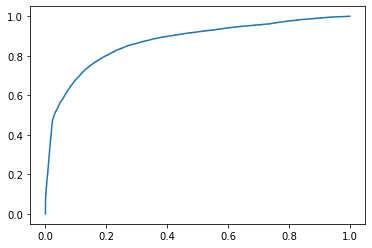

In [200]:
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(ytest,pred))
precision = precision_score(ytest, pred, average='binary')
print("Precision for Random Forest is: ", precision)
probs=rf_model.predict_proba(xtest)
preds=probs[:,1]
fpr,tpr,threshold=m.roc_curve(ytest,preds)
plt.plot(fpr,tpr)
roc_auc=m.auc(fpr,tpr)
print("AUC for random forest: ", roc_auc)

In [246]:
test = pd.read_csv("test_mSzZ8RL.csv")

In [247]:
test1=test.copy()

In [248]:
test1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [249]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [250]:
test = test.fillna("Unknown")

In [251]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,Unknown,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [253]:
test.drop(labels=["ID","Region_Code","Gender"],axis=1,inplace=True)

In [254]:
test1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [255]:
X_test = pd.get_dummies(test)

In [256]:
predicted_islead=rf_model.predict(X_test)

In [257]:
test1["Is_Lead"]=predicted_islead

In [258]:
test1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,1
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0


In [259]:
test1=test1.drop(["Gender","Age","Region_Code","Occupation","Channel_Code","Vintage","Credit_Product","Avg_Account_Balance","Is_Active"],axis=1)

In [260]:
test1.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [263]:
test1.set_index("ID",inplace=True)

In [264]:
test1.to_csv("Predict_IsLead.csv")